In [1]:
#Importation of the necessary libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd

In [2]:
# Load data into the notebook
# Assuming the file is in the current working directory
Distribution_Data = pd.read_csv('ev_distribution_dataset.csv')
Geospatial_Data = pd.read_csv('geospatial_dataset.csv')
Weather_Data = pd.read_csv('weather_dataset.csv')

In [3]:
Distribution_Data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [4]:
Geospatial_Data.head()

,Substation_ID,Substation_Location,Transmission_Line_Capacity (MW)
0,Substation_907,"(57.25813554648914, -70.90582041775649)",40
1,Substation_218,"(70.02538473360673, -84.38057237161145)",71
2,Substation_339,"(80.39323542610704, -75.79784143914193)",85
3,Substation_773,"(49.12307771334813, -87.3598904388042)",10
4,Substation_349,"(66.79887060665365, -86.51124108848195)",40


In [5]:
Weather_Data.head()

,Timestamp,Temperature (°C),Precipitation (mm),Weather_Conditions,Substation_ID
0,2020-01-03 11:00:00,28.865989,0.313611,Snowy,Substation_744
1,2020-01-03 17:00:00,28.902260,0.817728,Clear,Substation_516
2,2020-01-04 04:00:00,24.212651,4.516506,Clear,Substation_261
3,2020-01-04 23:00:00,29.024606,3.821278,Snowy,Substation_560
4,2020-01-05 00:00:00,24.126655,4.965771,Snowy,Substation_258


# Understanding the structure of the datasets

In [7]:
#Check data types and missinng values
Distribution_Data.info()

#Description of numerical columns
Distribution_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           500 non-null    object 
 1   Geographical_Area                   500 non-null    object 
 2   Customer_Type                       500 non-null    object 
 3   Electricity_Consumption (kWh)       500 non-null    float64
 4   EV_Charging_Station_Location        500 non-null    object 
 5   EV_Charging_Station_Specifications  500 non-null    object 
 6   EV_Type                             500 non-null    object 
 7   Charging_Habit                      500 non-null    object 
 8   Number_of_EVs                       500 non-null    int64  
 9   Substation_ID                       500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


,Electricity_Consumption (kWh),Number_of_EVs
count,500.000000,500.000000
mean,506.188554,5.240000
std,80.251238,2.577535
min,315.912577,1.000000
25%,439.978312,3.000000
50%,505.820872,5.000000
75%,557.230712,8.000000
max,718.980293,9.000000


**OBSERVATIONS**:

1. From above, we can see that the Distribution Data h asa  total of 10 columns and 500 Rows.
2. There are two Numerical columns, which are the Electricity Consumption column and  the Number of EVs.
3. The rest of the columns are Categorical Data.
4. From the chart as well as the dptioncribe we can see that the datsets, cotains no missing values.

In [9]:
#Check data types and missinng values
Geospatial_Data.info()

#Description of numerical columns
Geospatial_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Substation_ID                    50 non-null     object
 1   Substation_Location              50 non-null     object
 2   Transmission_Line_Capacity (MW)  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


,Transmission_Line_Capacity (MW)
count,50.000000
mean,52.740000
std,24.857808
min,10.000000
25%,33.250000
50%,51.500000
75%,74.750000
max,94.000000


**OBERSERVATIONS**:

1. From above, we can see that the Geospatial Data has a  total of 3 columns and 50 Rows.
2. There is one Numerical column, which is the Transmission Line column.
3. The rest of the columns are Categorical Data.
4. From the chart as well as the describe we can see that the datasets, contains no missing values

In [11]:
#Check data types and missing values
Weather_Data.info()

#Description of numerical columns
Weather_Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           97 non-null     object 
 1   Temperature (°C)    97 non-null     float64
 2   Precipitation (mm)  97 non-null     float64
 3   Weather_Conditions  97 non-null     object 
 4   Substation_ID       97 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.9+ KB


,Temperature (°C),Precipitation (mm)
count,97.000000,97.000000
mean,25.311668,2.542096
std,4.821917,1.396957
min,12.449425,0.007923
25%,22.245088,1.390244
50%,25.248302,2.688862
75%,28.902260,3.656106
max,34.104493,4.965771


**OBERSERVATIONS**:

1. From above, we can see that the Weather Data has a total of 5 columns and 97 Rows.
2. There are two Numerical columns, which are the Temperature column and  Precipitation column.
3. The rest of the columns are Categorical Data.
4. From the chart as well as the describe we can see that the datasets, contains no missing values

# Exploratory Data Analysis

#### This Phase involves both Univariate and Bivariate Analysis

##### Univariate Analysis
 1. Visualize the distribution of electricity consumption.
 2. Analyze the distribution of EV types, charging habits, customer type.

##### Bivariate Analysis
 
 3. Use geospatial data to visualize the locations of substations and EV charging stations.
 4. Analyze the capacity of transmission lines.

### Univariate Analysis

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


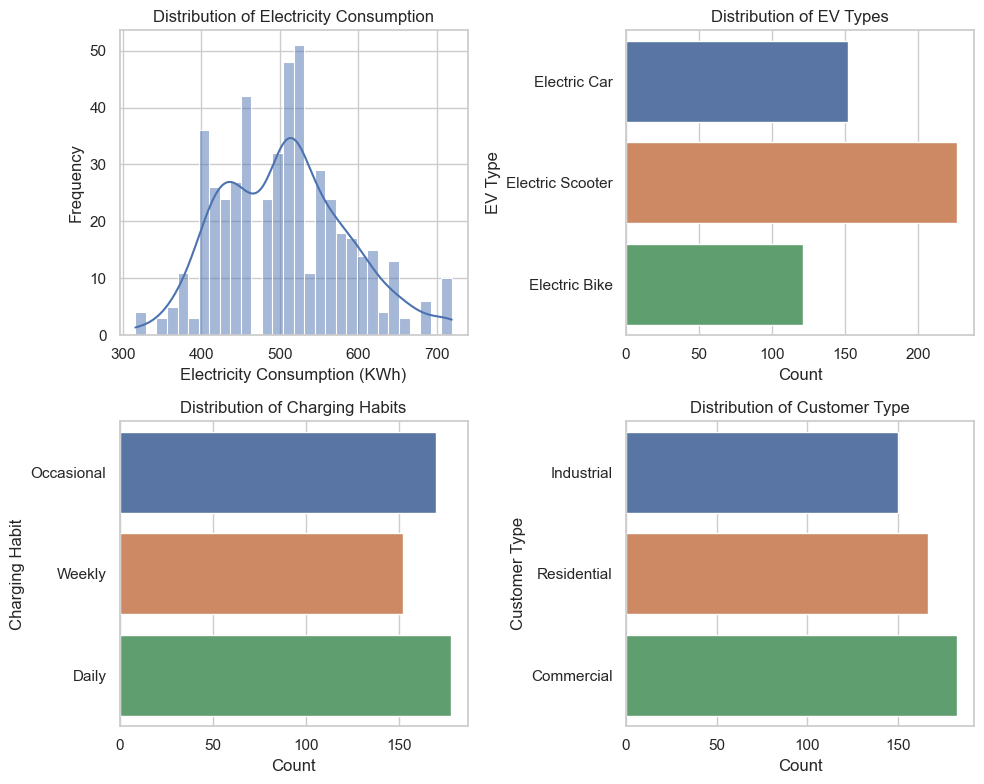

In [16]:
#EDA (Univariate Analysis)
#Set the style and color palatte of the plots
sns.set(style = "whitegrid")
sns.set_palette("deep")

#Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize = (10, 8))

#Plot distribution of electricity consumption
sns.histplot(data = Distribution_Data, x="Electricity_Consumption (kWh)", bins=30, kde=True, ax=axes[0, 0])
axes[0, 0]. set_title("Distribution of Electricity Consumption")
axes[0, 0]. set_xlabel("Electricity Consumption (KWh)")
axes[0, 0]. set_ylabel("Frequency")

#Plot distribution of EV Types
sns.countplot(data = Distribution_Data, y="EV_Type", ax=axes [0, 1])
axes[0, 1]. set_title("Distribution of EV Types")
axes[0, 1]. set_xlabel("Count")
axes[0, 1]. set_ylabel("EV Type")

#Plot distribution of Charging Habits
sns.countplot(data = Distribution_Data, y="Charging_Habit", ax=axes [1, 0])
axes[1, 0]. set_title("Distribution of Charging Habits")
axes[1, 0]. set_xlabel("Count")
axes[1, 0]. set_ylabel("Charging Habit")

#Plot distribution of Customer Types
sns.countplot(data = Distribution_Data, y="Customer_Type", ax=axes [1, 1])
axes[1, 1]. set_title("Distribution of Customer Type")
axes[1, 1]. set_xlabel("Count")
axes[1, 1]. set_ylabel("Customer Type")

#Adjust Layout
plt.tight_layout()

# Save the plot to a file
plt.savefig('univariate_analysis_plot.png', dpi=300)

#Show the plots
plt.show()

**OBSERVATIONS**:

1. Distribution of Electricity Consumption:
The electricity consumption is mostly centered around 500 kWh, with some instances of higher consumption.

2. Distribution of EV Types:
Electric scooters is the most common types of electric vehicles, while electric bike are the least common.

3. Distribution of Charging Habits:
Most customers charge their EVs daily, followed by occasional, and the least is weekly.

4. Distribution of Customer Type:
Most customers are commercial customers, followed by residential then Industrial.

### Bivariate Analysis

In [19]:
#Bivariate Analysis
#To proceed with the geospatial analysis, let's:
#Extract the latitude and longitude from the location columns (Substation_Location and EV_Charging_Station_Location) in the datasets.
#Plot the locations of the substations and EV charging stations on a map.

#Extract Lat. & Long. EV Charging Stations
Distribution_Data ['EV_Latitude'] = Distribution_Data ['EV_Charging_Station_Location'].apply(
    lambda x:float(x.split(",")[0].replace("(", "").strip()))
Distribution_Data ['EV_Longitude'] = Distribution_Data ['EV_Charging_Station_Location'].apply(
    lambda x:float(x.split(",")[1].replace(")", "").strip()))

#Extract Lat. & Long. for Substation Locations
Geospatial_Data ['Substation_Latitude'] = Geospatial_Data ['Substation_Location'].apply(
    lambda x:float(x.split(",")[0].replace("(", "").strip()))
Geospatial_Data ['Substation_Longitude'] = Geospatial_Data ['Substation_Location'].apply(
    lambda x:float(x.split(",")[1].replace(")", "").strip()))

#Drop the original location columns to clean up the dataframe
Distribution_Data = Distribution_Data.drop(columns = ['EV_Charging_Station_Location'])
Geospatial_Data = Geospatial_Data.drop(columns = ['Substation_Location'])

In [20]:
Distribution_Data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID,EV_Latitude,EV_Longitude
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
1,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
3,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964


In [21]:
Geospatial_Data.head()

,Substation_ID,Transmission_Line_Capacity (MW),Substation_Latitude,Substation_Longitude
0,Substation_907,40,57.258136,-70.905820
1,Substation_218,71,70.025385,-84.380572
2,Substation_339,85,80.393235,-75.797841
3,Substation_773,10,49.123078,-87.359890
4,Substation_349,40,66.798871,-86.511241


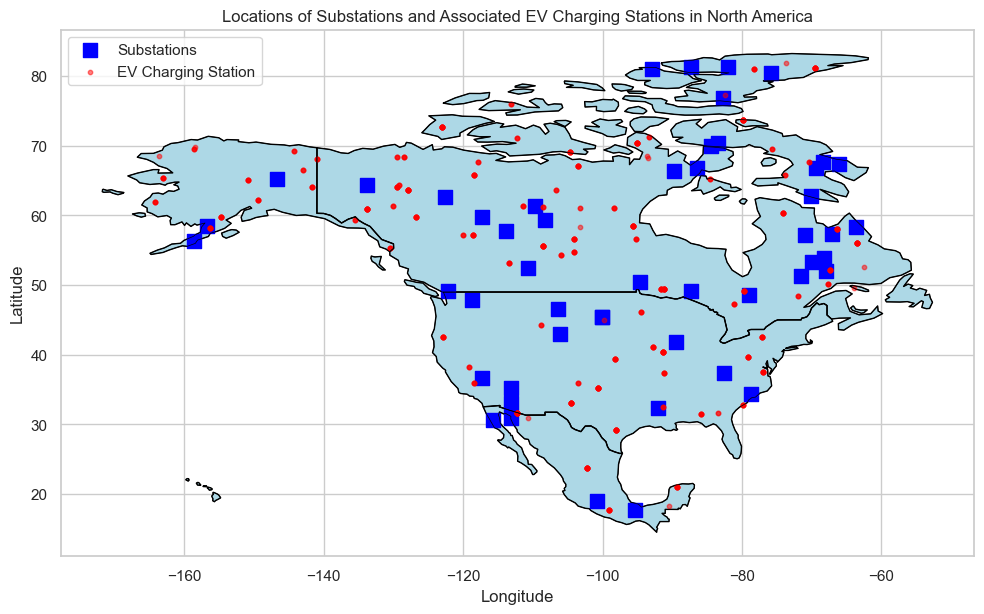

In [22]:
#Visualization of the Distribution
# Convert the dataframes to Geodataframes
EV_gdf = gpd.GeoDataFrame(Distribution_Data,
                geometry=gpd.points_from_xy(Distribution_Data.EV_Longitude, Distribution_Data.EV_Latitude))
Substation_gdf = gpd.GeoDataFrame(Geospatial_Data,
                geometry=gpd.points_from_xy(Geospatial_Data.Substation_Longitude, Geospatial_Data.Substation_Latitude))

# Load the world map data from a local file
world = gpd.read_file(r"C:\Users\Lenovo\Downloads\Natural_earth\ne_110m_admin_0_countries.shp")

# Filter the map to North America based on country names
north_america_countries = ["United States of America", "Canada", "Mexico"]
North_America = world[world['NAME'].isin(north_america_countries)]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(10, 7))
North_America.boundary.plot(ax=ax, linewidth=0.5, color='black')
North_America.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations on the map
Substation_gdf.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')
# Plotting ev charging stations on the map
EV_gdf.plot(ax=ax, markersize=10, color='red', label='EV Charging Station', alpha=0.5)

# Set the title and axis labels
plt.title('Locations of Substations and Associated EV Charging Stations in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.savefig('Visualization of the Distribution.png', dpi=300)
plt.show()

##### NOTE:
Blue markers represent substations, with the size of the marker proportional to the transmission line capacity.  
Red markers represent EV charging stations.

**OBSERVATIONS**  
Map 1: From the map, we can observe the spatial distribution of the substations and EV charging stations.

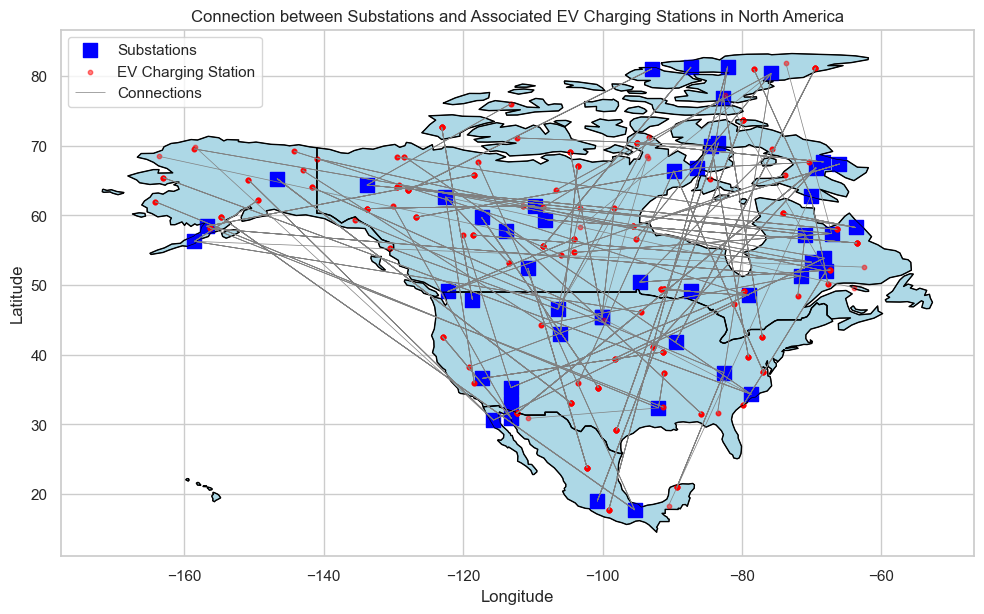

In [24]:
# To show the connection of each Substation to it's Ev charging station.
from shapely.geometry import LineString

# Convert the dataframes to Geodataframes
EV_gdf = gpd.GeoDataFrame(Distribution_Data,
    geometry=gpd.points_from_xy(Distribution_Data.EV_Longitude, Distribution_Data.EV_Latitude))
Substation_gdf = gpd.GeoDataFrame(Geospatial_Data,
    geometry=gpd.points_from_xy(Geospatial_Data.Substation_Longitude, Geospatial_Data.Substation_Latitude))

#Create lines connecting each Substation to its Associated EV Charging stations
lines = []
for _, EV_row in Distribution_Data.iterrows():
    Substation = Geospatial_Data[Geospatial_Data['Substation_ID'] == EV_row['Substation_ID']].iloc[0]
    line = [(EV_row['EV_Longitude'], EV_row['EV_Latitude']),
           (Substation['Substation_Longitude'], Substation['Substation_Latitude'])]
    lines.append(line)

line_gdf = gpd.GeoDataFrame(geometry=[LineString(line) for line in lines])

# Load the world map data from a local file
world = gpd.read_file(r"C:\Users\Lenovo\Downloads\Natural_earth\ne_110m_admin_0_countries.shp")

# Filter the map to North America based on country names
north_america_countries = ["United States of America", "Canada", "Mexico"]
North_America = world[world['NAME'].isin(north_america_countries)]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(10, 7))
North_America.boundary.plot(ax=ax, linewidth=0.5, color='black')
North_America.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substations on the map
Substation_gdf.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substations')
# Plotting ev charging stations on the map
EV_gdf.plot(ax=ax, markersize=10, color='red', label='EV Charging Station', alpha=0.5)
#Plotting line
line_gdf.plot(ax=ax, linewidth=0.5, color='gray', label='Connections')

# Set the title and axis labels
plt.title('Connection between Substations and Associated EV Charging Stations in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.savefig('Connection between Substation & EV Charging Station.png', dpi=300)
plt.show()

##### NOTE:
Blue markers represent substations, with the size of the marker proportional to the transmission line capacity.  
Red markers represent EV charging stations.

**OBSERVATIONS**  
Map 2: From the map, we can see the connection of each substation to its EV charging station, it looks a bit messy, so we are going to drill down to one substation to get a closer look.

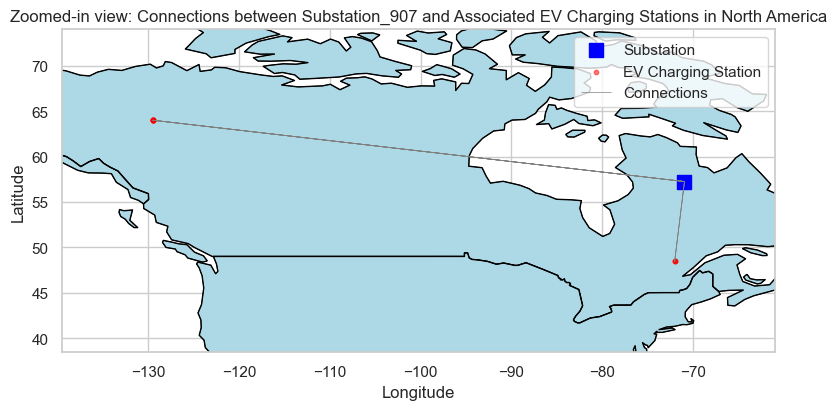

In [26]:
#Lets zoom in and see the connection of Substation 1 to EV Charging Stations
# Filter for the first Substation
Selected_Substation = Geospatial_Data.iloc[0]
Associated_EV = Distribution_Data[Distribution_Data['Substation_ID'] == Selected_Substation['Substation_ID']]

# Convert to GeoDataFrames
EV_gdf_selected = gpd.GeoDataFrame(Associated_EV, geometry=gpd.points_from_xy(Associated_EV.EV_Longitude, Associated_EV.EV_Latitude))
Substation_gdf_selected = gpd.GeoDataFrame(
    Selected_Substation.to_frame().transpose(),
    geometry=gpd.points_from_xy([Selected_Substation.Substation_Longitude], [Selected_Substation.Substation_Latitude])
)

# Create lines between Substation and associated EV Charging Stations
Lines_selected = [
    (Selected_Substation.Substation_Longitude, Selected_Substation.Substation_Latitude, EV_row.EV_Longitude, EV_row.EV_Latitude)
    for _, EV_row in Associated_EV.iterrows()
]
Line_gdf_selected = gpd.GeoDataFrame(
    geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in Lines_selected]
)

# Load the world map data from a local file
world = gpd.read_file(r"C:\Users\Lenovo\Downloads\Natural_earth\ne_110m_admin_0_countries.shp")

# Filter the map to North America based on country names
north_america_countries = ["United States of America", "Canada", "Mexico"]
North_America = world[world['NAME'].isin(north_america_countries)]

# Determining the bounding box for the zoomed-in area
buffer = 10  # degrees
minx, miny, maxx, maxy = Line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(8, 5))
North_America.boundary.plot(ax=ax, linewidth=0.5, color='black')
North_America.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substation on the map
Substation_gdf_selected.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substation')
# Plotting EV charging stations on the map
EV_gdf_selected.plot(ax=ax, markersize=10, color='red', label='EV Charging Station', alpha=0.5)
# Plotting lines
Line_gdf_selected.plot(ax=ax, linewidth=0.5, color='gray', label='Connections')

# Setting the zoomed-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Set the title and axis labels
plt.title(f"Zoomed-in view: Connections between {Selected_Substation['Substation_ID']} and Associated EV Charging Stations in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.savefig('ZoomedIn Connection between Substation & EV Charging Station.png', dpi=300)
plt.show()

##### NOTE:
Blue markers represent substations, with the size of the marker proportional to the transmission line capacity.  
Red markers represent EV charging stations.

**OBSERVATIONS**  
Map 3: This shows a more zoomed out version of the map, focusing on one substation, but from the look of it, it seems the EV charging station are a bit far from it's substation, not to be biased, we have to drill down to two more substations to get a closer look.

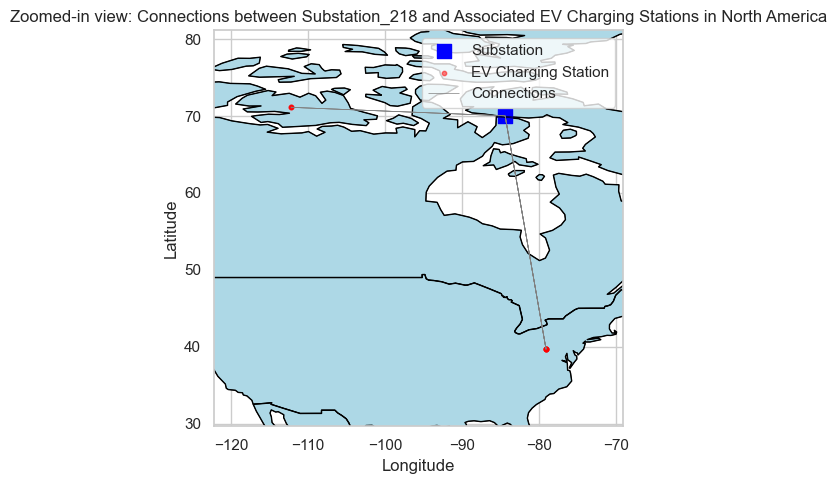

In [28]:
#Lets zoom in and see the connection of Substation 2 to EV Charging Stations
# Filter for the first Substation
Selected_Substation = Geospatial_Data.iloc[1]
Associated_EV = Distribution_Data[Distribution_Data['Substation_ID'] == Selected_Substation['Substation_ID']]

# Convert to GeoDataFrames
EV_gdf_selected = gpd.GeoDataFrame(Associated_EV, geometry=gpd.points_from_xy(Associated_EV.EV_Longitude, Associated_EV.EV_Latitude))
Substation_gdf_selected = gpd.GeoDataFrame(
    Selected_Substation.to_frame().transpose(),
    geometry=gpd.points_from_xy([Selected_Substation.Substation_Longitude], [Selected_Substation.Substation_Latitude])
)

# Create lines between Substation and associated EV Charging Stations
Lines_selected = [
    (Selected_Substation.Substation_Longitude, Selected_Substation.Substation_Latitude, EV_row.EV_Longitude, EV_row.EV_Latitude)
    for _, EV_row in Associated_EV.iterrows()
]
Line_gdf_selected = gpd.GeoDataFrame(
    geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in Lines_selected]
)

# Load the world map data from a local file
world = gpd.read_file(r"C:\Users\Lenovo\Downloads\Natural_earth\ne_110m_admin_0_countries.shp")

# Filter the map to North America based on country names
north_america_countries = ["United States of America", "Canada", "Mexico"]
North_America = world[world['NAME'].isin(north_america_countries)]

# Determining the bounding box for the zoomed-in area
buffer = 10  # degrees
minx, miny, maxx, maxy = Line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(8, 5))
North_America.boundary.plot(ax=ax, linewidth=0.5, color='black')
North_America.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substation on the map
Substation_gdf_selected.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substation')
# Plotting EV charging stations on the map
EV_gdf_selected.plot(ax=ax, markersize=10, color='red', label='EV Charging Station', alpha=0.5)
# Plotting lines
Line_gdf_selected.plot(ax=ax, linewidth=0.5, color='gray', label='Connections')

# Setting the zoomed-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Set the title and axis labels
plt.title(f"Zoomed-in view: Connections between {Selected_Substation['Substation_ID']} and Associated EV Charging Stations in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

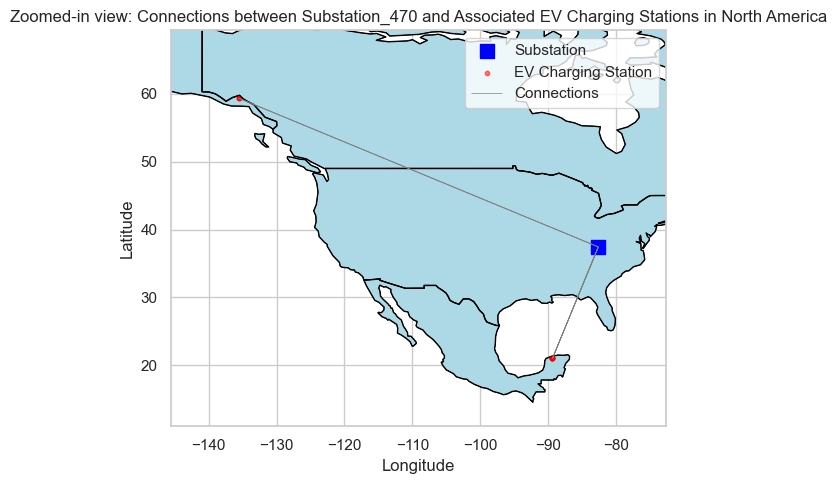

In [29]:
#Lets zoom in and see the connection of Substation 50 to EV Charging Stations
# Filter for the first Substation
Selected_Substation = Geospatial_Data.iloc[49]
Associated_EV = Distribution_Data[Distribution_Data['Substation_ID'] == Selected_Substation['Substation_ID']]

# Convert to GeoDataFrames
EV_gdf_selected = gpd.GeoDataFrame(Associated_EV, geometry=gpd.points_from_xy(Associated_EV.EV_Longitude, Associated_EV.EV_Latitude))
Substation_gdf_selected = gpd.GeoDataFrame(
    Selected_Substation.to_frame().transpose(),
    geometry=gpd.points_from_xy([Selected_Substation.Substation_Longitude], [Selected_Substation.Substation_Latitude])
)

# Create lines between Substation and associated EV Charging Stations
Lines_selected = [
    (Selected_Substation.Substation_Longitude, Selected_Substation.Substation_Latitude, EV_row.EV_Longitude, EV_row.EV_Latitude)
    for _, EV_row in Associated_EV.iterrows()
]
Line_gdf_selected = gpd.GeoDataFrame(
    geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in Lines_selected]
)

# Load the world map data from a local file
world = gpd.read_file(r"C:\Users\Lenovo\Downloads\Natural_earth\ne_110m_admin_0_countries.shp")

# Filter the map to North America based on country names
north_america_countries = ["United States of America", "Canada", "Mexico"]
North_America = world[world['NAME'].isin(north_america_countries)]

# Determining the bounding box for the zoomed-in area
buffer = 10  # degrees
minx, miny, maxx, maxy = Line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(8, 5))
North_America.boundary.plot(ax=ax, linewidth=0.5, color='black')
North_America.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting the substation on the map
Substation_gdf_selected.plot(ax=ax, marker='s', markersize=100, color='blue', label='Substation')
# Plotting EV charging stations on the map
EV_gdf_selected.plot(ax=ax, markersize=10, color='red', label='EV Charging Station', alpha=0.5)
# Plotting lines
Line_gdf_selected.plot(ax=ax, linewidth=0.5, color='gray', label='Connections')

# Setting the zoomed-in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Set the title and axis labels
plt.title(f"Zoomed-in view: Connections between {Selected_Substation['Substation_ID']} and Associated EV Charging Stations in North America")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.show()

**OBSERVATION**:  

1. We can see that the Ev charging station are somewhat far from it's Substation, this could be a contributing factoring to some grid overload.

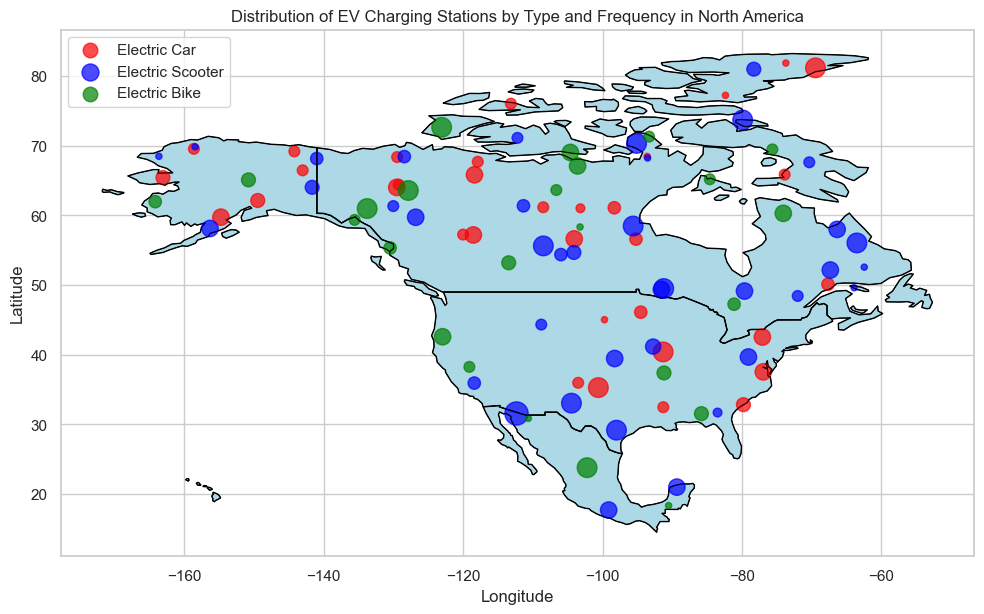

In [31]:
#Based on the EV type, let's get a closer look at how well the EV types are doing in each EV Charging Station.
#Group by the Location and Ev type, then count the number of stations
grouped_data = Distribution_Data.groupby(['EV_Latitude', 'EV_Longitude', 'EV_Type']).size().reset_index(name = 'Count')

# Convert grouped data to GeoDataFrame
grouped_gdf = gpd.GeoDataFrame(grouped_data,
                               geometry=gpd.points_from_xy(grouped_data.EV_Longitude, grouped_data.EV_Latitude))

# Load the world map data from a local file and filter for North America based on country names
world = gpd.read_file(r"C:\Users\Lenovo\Downloads\Natural_earth\ne_110m_admin_0_countries.shp")
north_america_countries = ["United States of America", "Canada", "Mexico"]
North_America = world[world['NAME'].isin(north_america_countries)]

# Define colors for different EV types
colors = {'Electric Car':'red', 'Electric Scooter':'blue', 'Electric Bike':'green'}

# Plotting the map for North America
fig, ax = plt.subplots(figsize=(10, 7))
North_America.boundary.plot(ax=ax, linewidth=0.5, color='black')
North_America.plot(ax=ax, color='lightblue', edgecolor='black')

# Plotting EV Type
for EV_Type, color in colors.items():
    sub_gdf = grouped_gdf[grouped_gdf['EV_Type'] == EV_Type]
    sub_gdf.plot(ax=ax, markersize=sub_gdf['Count']*20, color=color, label=EV_Type, alpha=0.7)

# Set the title and axis labels
plt.title('Distribution of EV Charging Stations by Type and Frequency in North America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.savefig('Distribution of EV Charging Station by EV Type.png', dpi=300)
plt.show()

### NETWORK CAPACITY ASSESSMENT

To perform network capacity assessment:

1. Calculate the total electricity consumption for each substation.

2. Compare the total electricity consumption with the transmission line capacity.

In [33]:
#Network Capacity Assessment
#Group the EV Distribution data by Substation ID and calculate the total electricity consumption for each Substation
total_consumption_per_substation = Distribution_Data.groupby ('Substation_ID')['Electricity_Consumption (kWh)'].sum().reset_index()

#Merging the total consumption data with geospatial data
network_capacity_data = pd.merge(Geospatial_Data, total_consumption_per_substation, on = 'Substation_ID')

#Rename the column for a better understanding
network_capacity_data.rename(columns = {'Electricity_Consumption (kWh)': 'Total_Consumption (kWh)'}, inplace=True)

#Calculating the ratio of Total consumption to transmission line capacity
#N.B--Conversion: 1 MW = 1000 kWh
network_capacity_data['Consumption_to_Capacity_Ratio'] = network_capacity_data['Total_Consumption (kWh)']/\
(network_capacity_data['Transmission_Line_Capacity (MW)'] * 1000)

#Displaying the network capacity data
network_capacity_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),Substation_Latitude,Substation_Longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio
0,Substation_907,40,57.258136,-70.905820,6663.768920,0.166594
1,Substation_218,71,70.025385,-84.380572,5997.437051,0.084471
2,Substation_339,85,80.393235,-75.797841,4536.778685,0.053374
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
4,Substation_349,40,66.798871,-86.511241,4901.836555,0.122546


##### NOTE:
 
The table above includes:

1. Total_Consumption (kWh): the total electricity consumption for each substation.

2. Consumption_to_Capacity_Ratio: the ratio of total electricity consumption to the transmission line capacity for each substation.

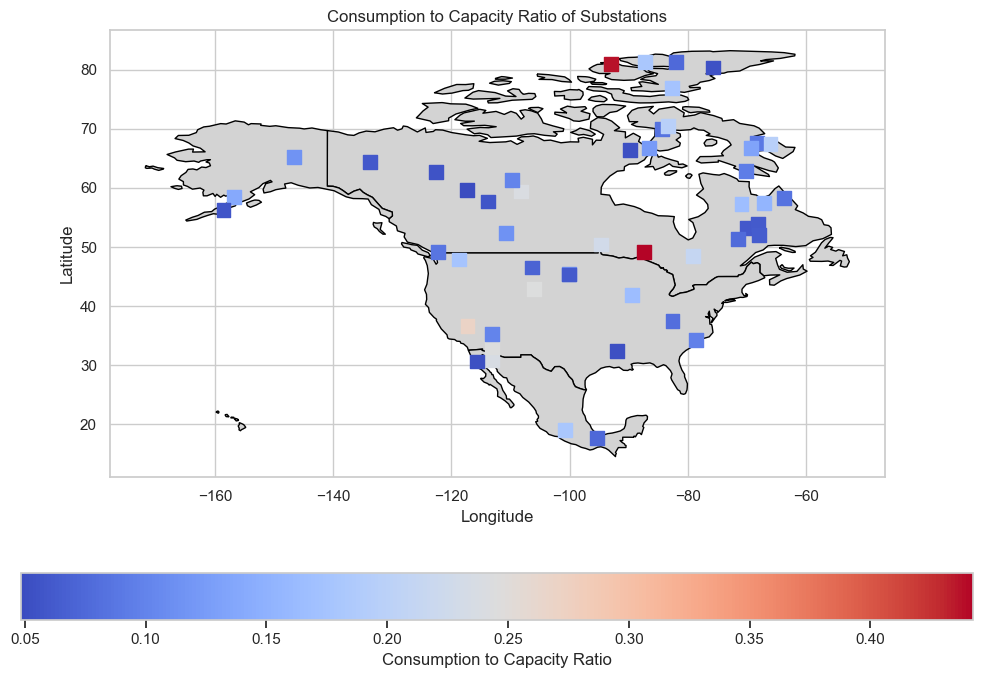

In [35]:
from shapely.geometry import Point

#Create the Geodataframe for the network capacity data with updated geometry for the dataframe
geometry_network_capacity = [Point(lon, lat) for lon, lat in zip (network_capacity_data['Substation_Longitude'], network_capacity_data['Substation_Latitude'])]
gdf_network_capacity = gpd.GeoDataFrame (network_capacity_data, geometry=geometry_network_capacity)

#Plotting in choropleth style
fig, ax=plt.subplots(figsize = (10, 7))
North_America.plot(ax=ax, color = 'lightgray', edgecolor = 'black')
gdf_network_capacity.plot(column = 'Consumption_to_Capacity_Ratio', cmap = 'coolwarm', legend = True,
                         marker = 's', markersize = 100, ax=ax, legend_kwds={'label':"Consumption to Capacity Ratio", 'orientation':"horizontal"})

ax.set_title("Consumption to Capacity Ratio of Substations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.savefig('Consumption to Capacity Ratio of Substations.png', dpi=300)
plt.show()

In [36]:
#Let's also investigate if the number of EVs that come to the EV stations of a substation also has any correlation with the overload.
#Group by the Substation_ID for the number of EVs
ev_counts = Distribution_Data.groupby('Substation_ID')['Number_of_EVs'].sum().reset_index()

#Merge network capacity data with ev counts
final_data = pd.merge(ev_counts, network_capacity_data, on = 'Substation_ID')

#CORRELATION
correlation_ratio = final_data['Number_of_EVs'].corr(final_data['Consumption_to_Capacity_Ratio'])
correlation_ratio

-0.10944923035990646

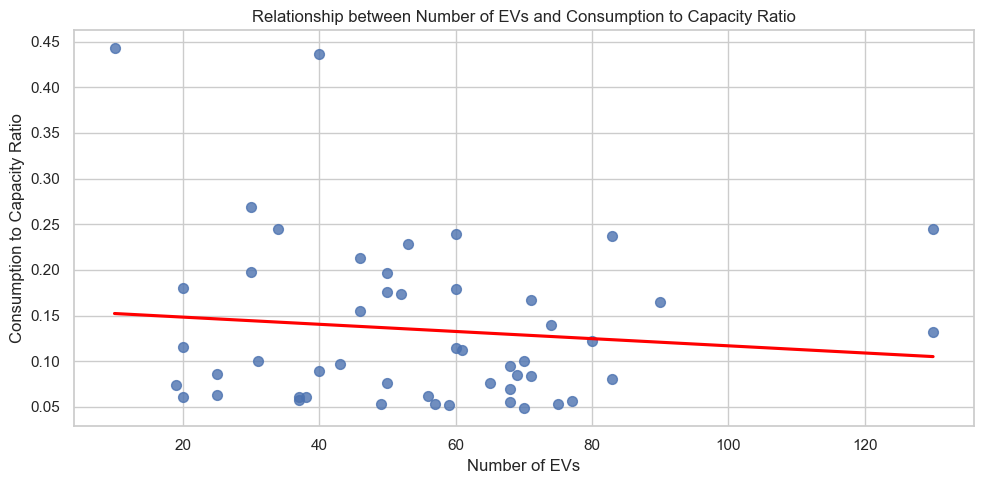

In [37]:
#Scatter plot with regression line
plt.figure(figsize=(10, 5))
sns.regplot(x='Number_of_EVs', y='Consumption_to_Capacity_Ratio', data=final_data, scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None)
plt.title('Relationship between Number of EVs and Consumption to Capacity Ratio')
plt.xlabel('Number of EVs')
plt.ylabel('Consumption to Capacity Ratio')
plt.grid(True)
plt.tight_layout()
plt.savefig('Relationship between no of EVs and C2C ratio.png', dpi=300)
plt.show()

#### OBSERVATIONS:  
The map above visualizes the "Consumption to Capacity Ratio" for each substation, with the color scale representing the ratio.  

- Substations in red have a higher "Consumption to Capacity Ratio", indicating potential overloads in the network.
- Substations in blue have a lower ratio, indicating that the network capacity is sufficient for the current load.
- The correlation between the number of EVs to the overload is weak, so it can't be quantified as one of the reasons for the overload in certain areas.


**IDENTIFYING BOTTLENECKS**  
By analyzing the map, we can identify the substations and areas that are potential bottlenecks in the distribution network. These are the areas where the "Consumption to Capacity Ratio" is high.

In [40]:
#To identify these bottlenecks, let's filter out the substations with a "Consumption to Capacity Ratio" close to or greater than 1. 
#These are the substations where immediate attention and investment may be necessary to prevent overloads and ensure the reliable delivery of electricity.
#Filtering C2C Ratio greater than 1
bottleneck_substation = network_capacity_data[network_capacity_data['Consumption_to_Capacity_Ratio'] >= 0.9]

#Displaying
bottleneck_substation

,Substation_ID,Transmission_Line_Capacity (MW),Substation_Latitude,Substation_Longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio


**OBSERVATIONS**:  
- There seems to be an empty set of substaions that fall into this category.

**OPTIMIZING NETWORK UPGRADES**  
For optimizing network upgrades, the focus will be on substations with a high "Consumption to Capacity Ratio". Upgrading the transmission lines or adding additional capacity in these areas can help in managing the increased load effectively and ensuring grid reliability.  

Additionally, consider factors like;   
- Geographical distribution of EV charging stations because it seems like the EV charging stations are quite far from the Substaions and their load demand.
- Potential future growth in EV adoption in different areas.
- Costs associated with different upgrade options.

In [43]:
#Optimizing Network Upgrade
#The identification of the top 5 substations with the highest "Consumption to Capacity Ratio"
top_5_substations = network_capacity_data.nlargest(5, 'Consumption_to_Capacity_Ratio')
top_5_substations

,Substation_ID,Transmission_Line_Capacity (MW),Substation_Latitude,Substation_Longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
14,Substation_87,12,81.031814,-92.941747,5243.800714,0.436983
27,Substation_711,17,36.618181,-117.277556,4579.354677,0.269374
20,Substation_11,43,33.082269,-113.118931,10534.827701,0.244996
42,Substation_258,22,42.952789,-106.049333,5378.214378,0.244464


**CORRELATION WITH WEATHER DATA**  
Analyzing the correlation between weather data and electricity consumption or network issues can provide insights into how weather conditions affect the distribution network.

In [45]:
#Merge weather data with distribution data
merged_data = pd.merge(Distribution_Data, Weather_Data, on = ['Timestamp', 'Substation_ID'])

#Calculate the correlation between weather conditions and electricity consumption
correlation_matrix = merged_data[['Electricity_Consumption (kWh)', 'Temperature (°C)', 'Precipitation (mm)']].corr()

#Display
correlation_matrix

,Electricity_Consumption (kWh),Temperature (°C),Precipitation (mm)
Electricity_Consumption (kWh),1.000000,0.131543,0.085014
Temperature (°C),0.131543,1.000000,-0.005828
Precipitation (mm),0.085014,-0.005828,1.000000


**OBSERVATIONS**  
The correlation matrix above shows the correlation coefficients between electricity consumption, temperature, and precipitation:  
- The correlation between Electricity_Consumption (kWh) and Temperature (°C) is approximately 0.044.
- The correlation between Electricity_Consumption (kWh) and Precipitation (mm) is approximately 0.027.  
  These values suggest that there is a very weak correlation between electricity consumption, temperature, and precipitation in this dataset.

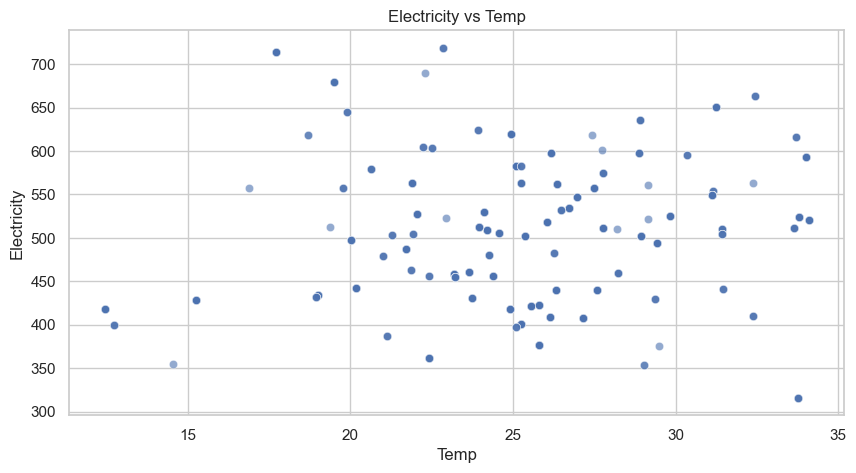

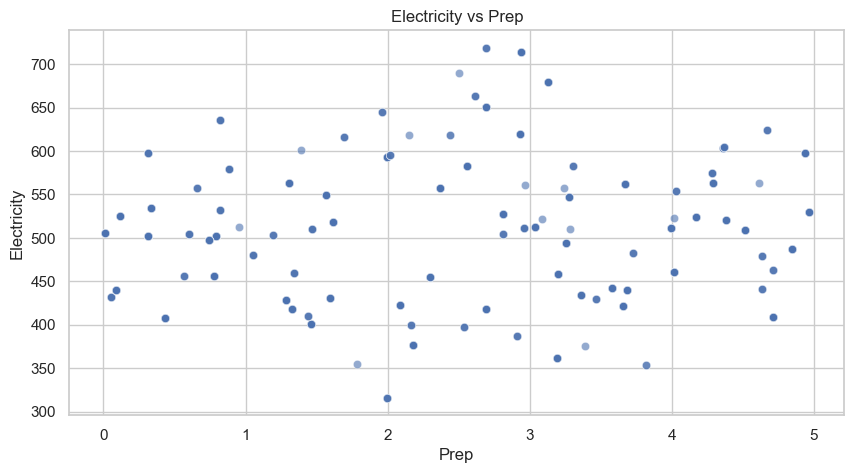

In [47]:
#Visualizing the relationship using a scatter plot for a better understanding
#Electricity consumption vs Temperature
plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_data, x='Temperature (°C)', y='Electricity_Consumption (kWh)', alpha=0.6)
plt.title('Electricity vs Temp')
plt.xlabel('Temp')
plt.ylabel('Electricity')
plt.savefig('Electricity vs Temp', dpi=300)
plt.show()

#Electricity vs Precipitation
plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_data, x='Precipitation (mm)', y='Electricity_Consumption (kWh)', alpha=0.6)
plt.title('Electricity vs Prep')
plt.xlabel('Prep')
plt.ylabel('Electricity')
plt.savefig('Electricity vs Prep', dpi=300)
plt.show()

**OBSERVATIONS**  
From the plots, we can make the following observations:  
- **Electricity Consumption vs Temperature**: There is no clear trend indicating a relationship between electricity consumption and temperature. The points are scattered broadly across the plot.
- **Electricity Consumption vs Precipitation**: Similarly, there is no clear trend indicating a relationship between electricity consumption and precipitation. The points are broadly distributed.  
  In conclusion, based on the current dataset, weather conditions such as temperature and precipitation have a very weak correlation with electricity consumption. This suggests that other factors might be more influential in affecting electricity consumption in the distribution network. However, it's still important to consider weather data for network analysis as extreme weather conditions can have an impact on the distribution network and its components, potentially leading to outages and other issues.

**INSIGHTS**  
  
1.  **Electricity Consumption**: The electricity consumption is mostly centered around 500 kWh, with certain instances of higher consumption. This indicates varied demand at different times and locations.
 
 
 2. **EV Types and Charging Habits**: Electric scooters are the most common types of EVs. Most customers charge their EVs daily, indicating a consistent daily load on the distribution network.
 
 
 3. **Consumer Type**: Most Customers are commercial consumers.
 
 
 4. **Geospatial Distribution**: The spatial distribution of substations and EV charging stations is widespread. 
 
 
 5.  **Geospatial Distribution**: The EV charging station seems to be too far from its corresponding Substation.
 
 
 6. **Network Capacity**: Some substations have a high Consumption_to_Capacity_Ratio, indicating potential bottlenecks and overloads in the network. There is also no correlation between the number of EVs per substation and the Consumption to Capacity Ratio, this shows that the number of EVs is not a factor for overload.


 7. **Weather Correlation**: The correlation between weather conditions (temperature and precipitation) and electricity consumption is weak in the current dataset, suggesting that other factors might be more influential in affecting electricity consumption.

**THE OPTIMIZATION STRATEGY/RECOMMENDATION**  
##### This is based on the analysis done and the business problems at hand, all these should be incorporated into the business.

1. **Prioritize Substation Upgrades:**
    Prioritize upgrades at substations where the `Consumption_to_Capacity_Ratio` is high, indicating potential overloads. Upgrade the transmission lines because the statataions are too far from their corresponding Substations.


2. **Geospatial Analysis for Upgrade Planning:**
    Use geospatial analysis to determine the optimal locations for new substations or upgrades to existing ones. Consider factors like the proximity to high load demand areas (areas with high consumptiona to capcity ratio) and geographical constraints.
